<a href="https://colab.research.google.com/github/imanjanoo2001/info498I/blob/main/INFO_498_Final_Project_Data_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
#import libraries
from google.colab import files
import pandas as pd
import io
import matplotlib.pyplot as plt

In [13]:
# Upload the files
uploaded = files.upload()

# Dictionary to store DataFrames
dataframes = {}

# Load each CSV file into a DataFrame
for file_name in uploaded.keys():
    try:
        df = pd.read_csv(io.BytesIO(uploaded[file_name]))
        dataframes[file_name] = df
        print(f"Successfully loaded {file_name}")
    except UnicodeDecodeError as e:
        print(f"Failed to load {file_name}, trying with different encoding. Error: {e}")
        df = pd.read_csv(io.BytesIO(uploaded[file_name]), encoding='latin1')
        dataframes[file_name] = df
        print(f"Successfully loaded {file_name} with latin1 encoding")

# Display the first few rows of each DataFrame to verify
for file_name, df in dataframes.items():
    print(f"\nFirst few rows of {file_name}:")
    print(df.head())


Saving Translated-neutral-comments.csv to Translated-neutral-comments (3).csv
Saving translated-pro-israel-comments.csv to translated-pro-israel-comments (2).csv
Saving Translated-pro-palestine-comments.csv to Translated-pro-palestine-comments (2).csv
Saving UPDATED-neutral-posts.csv to UPDATED-neutral-posts (3).csv
Saving updated-pro-israel-posts.csv to updated-pro-israel-posts (2).csv
Saving UPDATED-pro-palestine-posts.csv to UPDATED-pro-palestine-posts (2).csv
Successfully loaded Translated-neutral-comments (3).csv
Successfully loaded translated-pro-israel-comments (2).csv
Successfully loaded Translated-pro-palestine-comments (2).csv
Successfully loaded UPDATED-neutral-posts (3).csv
Successfully loaded updated-pro-israel-posts (2).csv
Successfully loaded UPDATED-pro-palestine-posts (2).csv

First few rows of Translated-neutral-comments (3).csv:
       Media_ID    Comment_ID            Username  \
0  3.370240e+18  1.806620e+16         lschmutter1   
1  3.370240e+18  1.784330e+16   th

In [17]:
print(dataframes.keys())

dict_keys(['Translated-neutral-comments (3).csv', 'translated-pro-israel-comments (2).csv', 'Translated-pro-palestine-comments (2).csv', 'UPDATED-neutral-posts (3).csv', 'updated-pro-israel-posts (2).csv', 'UPDATED-pro-palestine-posts (2).csv'])


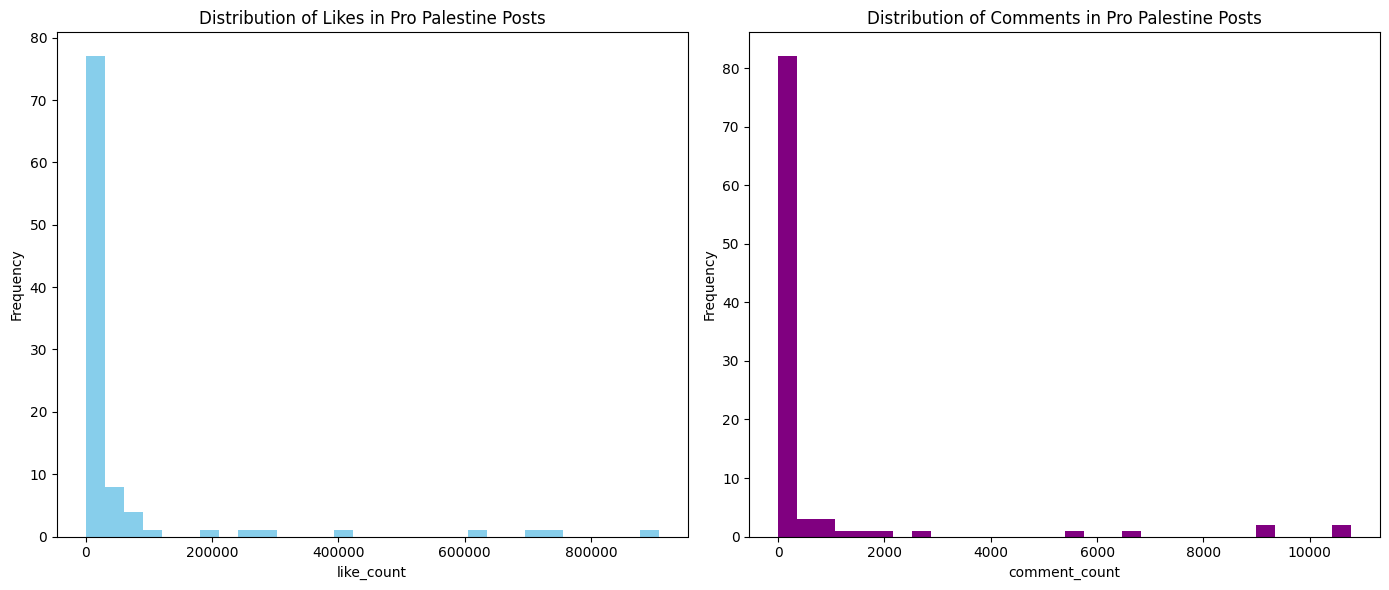

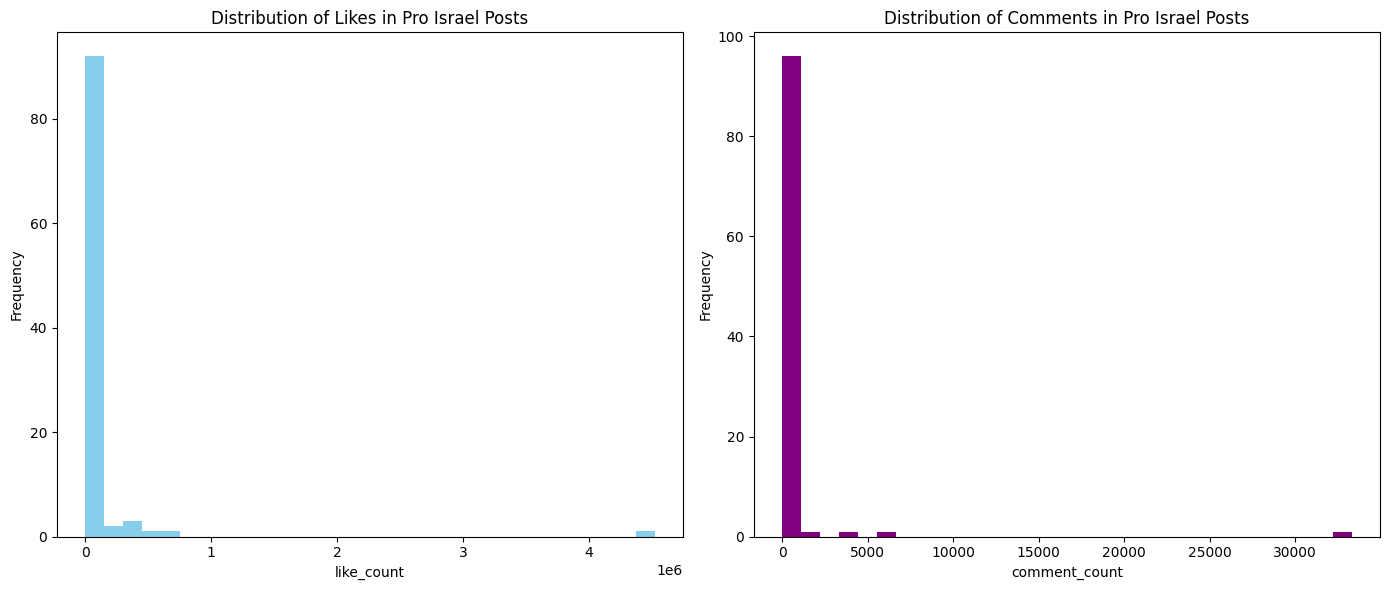

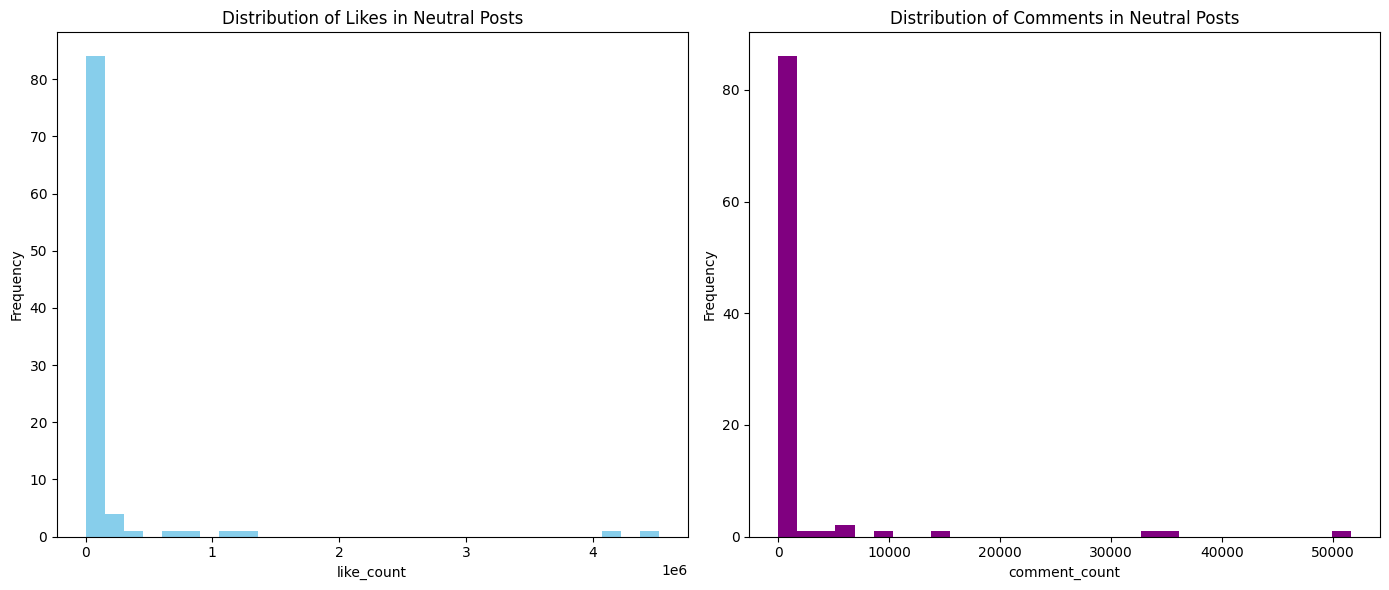

In [23]:
import matplotlib.pyplot as plt

# List of DataFrame names for posts
post_files = ['UPDATED-pro-palestine-posts (2).csv', 'updated-pro-israel-posts (2).csv', 'UPDATED-neutral-posts (3).csv']

# Custom base titles for the posts
custom_titles_posts = {
    'UPDATED-pro-palestine-posts (2).csv': 'Pro Palestine Posts',
    'updated-pro-israel-posts (2).csv': 'Pro Israel Posts',
    'UPDATED-neutral-posts (3).csv': 'Neutral Posts'
}

# Plot histograms for Like Count and Comment Count
for file_name in post_files:
    df = dataframes[file_name]

    plt.figure(figsize=(14, 6))

    plt.subplot(1, 2, 1)
    plt.hist(df['like_count'].dropna(), bins=30, color='skyblue')
    plt.title(f'Distribution of Likes in {custom_titles_posts[file_name]}')
    plt.xlabel('like_count')
    plt.ylabel('Frequency')

    plt.subplot(1, 2, 2)
    plt.hist(df['comment_count'].dropna(), bins=30, color='purple')
    plt.title(f'Distribution of Comments in {custom_titles_posts[file_name]}')
    plt.xlabel('comment_count')
    plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()

In [24]:
!pip install vaderSentiment

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 1.2 MB/s eta 0:00:00


In [25]:
print(dataframes.keys())

dict_keys(['Translated-neutral-comments (3).csv', 'translated-pro-israel-comments (2).csv', 'Translated-pro-palestine-comments (2).csv', 'UPDATED-neutral-posts (3).csv', 'updated-pro-israel-posts (2).csv', 'UPDATED-pro-palestine-posts (2).csv'])


<ipython-input-30-4269dbd4ec96>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sentiment Category', data=df, palette='viridis')


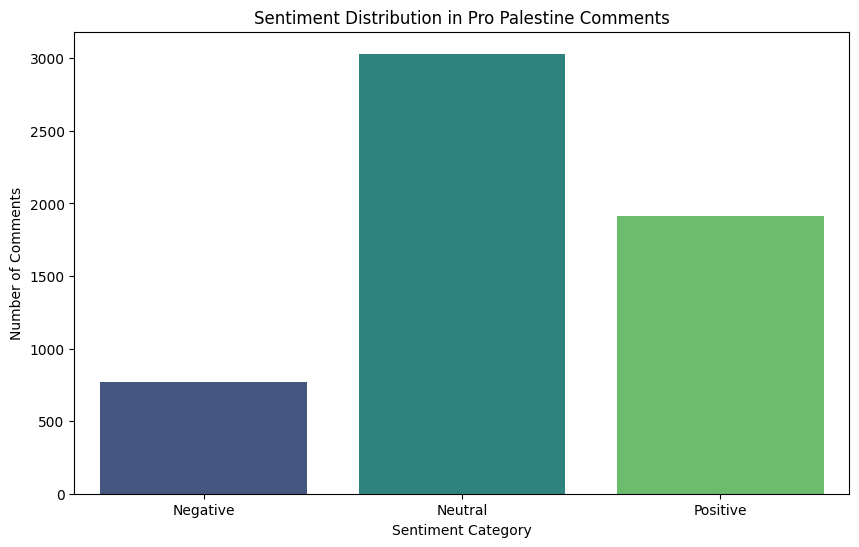

<ipython-input-30-4269dbd4ec96>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sentiment Category', data=df, palette='viridis')


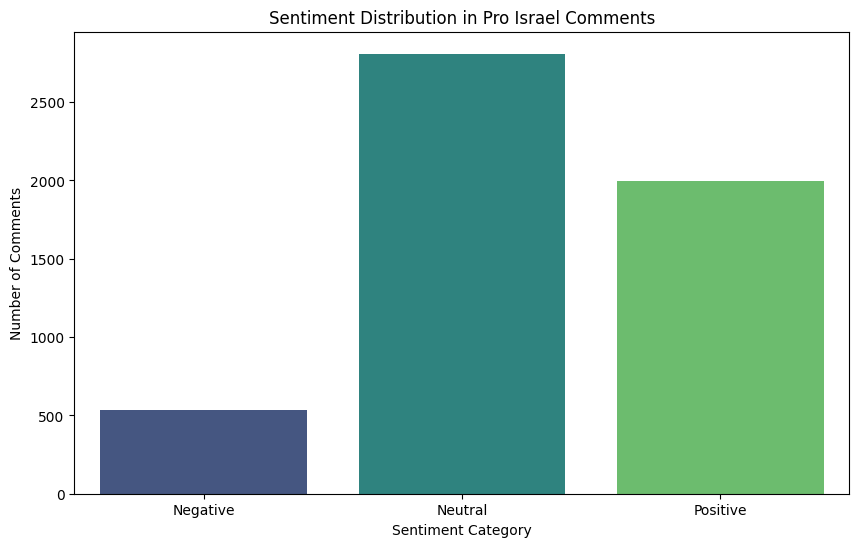

<ipython-input-30-4269dbd4ec96>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sentiment Category', data=df, palette='viridis')


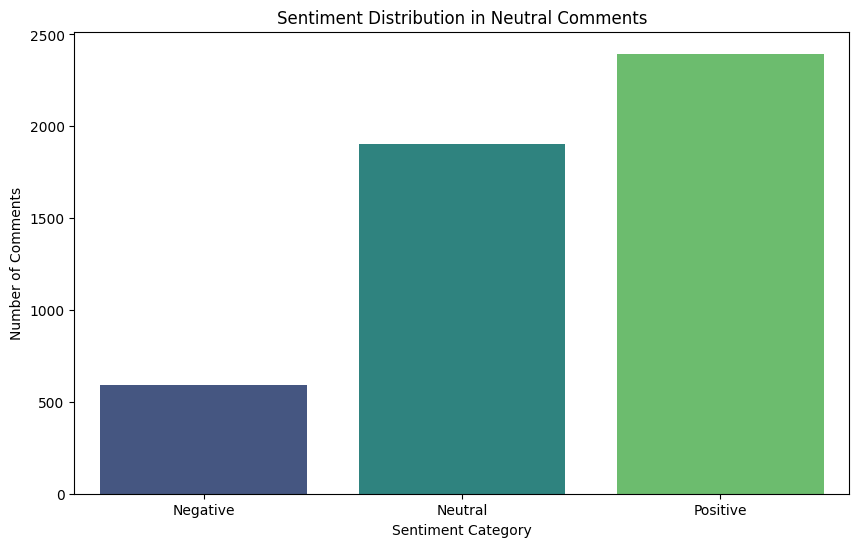

In [30]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import seaborn as sns

# Initialize sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Custom base titles for the comments
custom_titles_comments = {
    'Translated-pro-palestine-comments (2).csv': 'Pro Palestine Comments',
    'translated-pro-israel-comments (2).csv': 'Pro Israel Comments',
    'Translated-neutral-comments (3).csv': 'Neutral Comments'
}

# List of comment file names
comment_files = ['Translated-pro-palestine-comments (2).csv', 'translated-pro-israel-comments (2).csv', 'Translated-neutral-comments (3).csv']

# Analyze sentiment for each comment DataFrame
for file_name in comment_files:
    df = dataframes[file_name]
    df['Sentiment'] = df['Translated_Comment_Text'].apply(lambda x: analyzer.polarity_scores(x)['compound'] if pd.notnull(x) else 0)

    # Categorize sentiments
    df['Sentiment Category'] = pd.cut(df['Sentiment'], bins=[-1, -0.05, 0.05, 1], labels=['Negative', 'Neutral', 'Positive'])

    # Plot the distribution of sentiments
    plt.figure(figsize=(10, 6))
    sns.countplot(x='Sentiment Category', data=df, palette='viridis')
    plt.title(f'Sentiment Distribution in {custom_titles_comments[file_name]}')
    plt.xlabel('Sentiment Category')
    plt.ylabel('Number of Comments')
    plt.show()

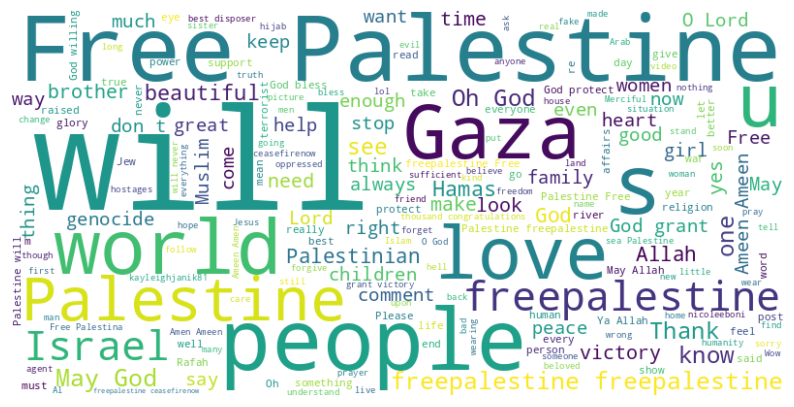

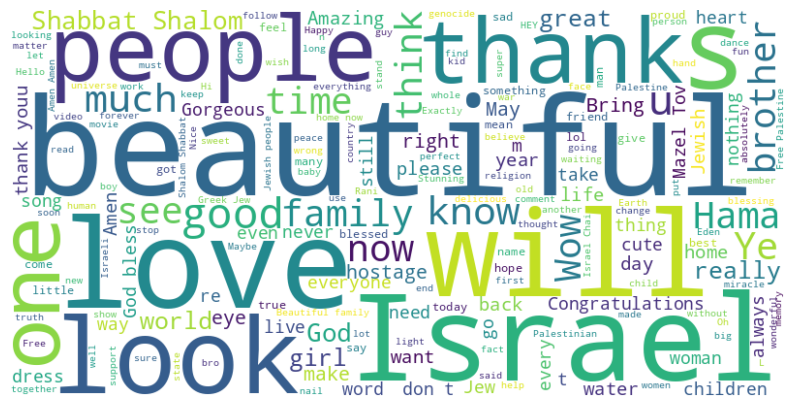

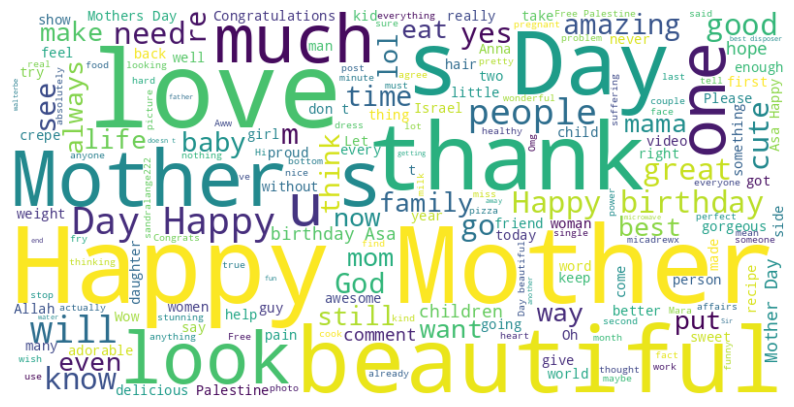

In [31]:
from wordcloud import WordCloud

#creating a culminated wordcloud

# Define a function to generate word clouds
def generate_word_cloud(text_data):
    # Join all the comment texts into a single string
    text = ' '.join(text_data.dropna())

    # Generate the word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Display the word cloud
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

# Generate word clouds for each comment DataFrame
for file_name in comment_files:
    df = dataframes[file_name]
    generate_word_cloud(df['Translated_Comment_Text'])

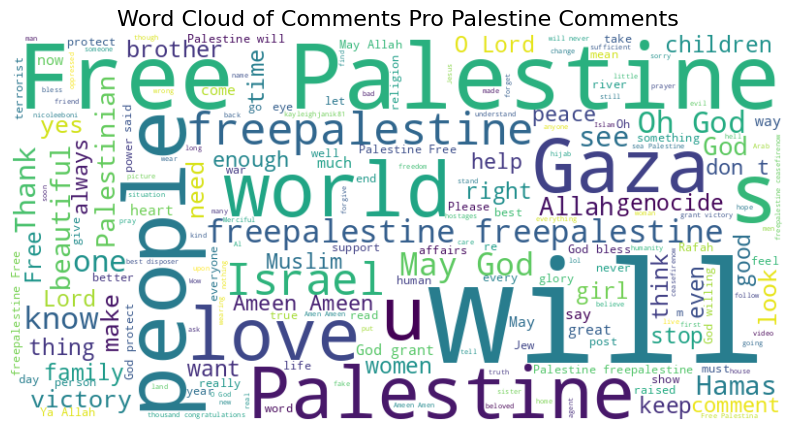

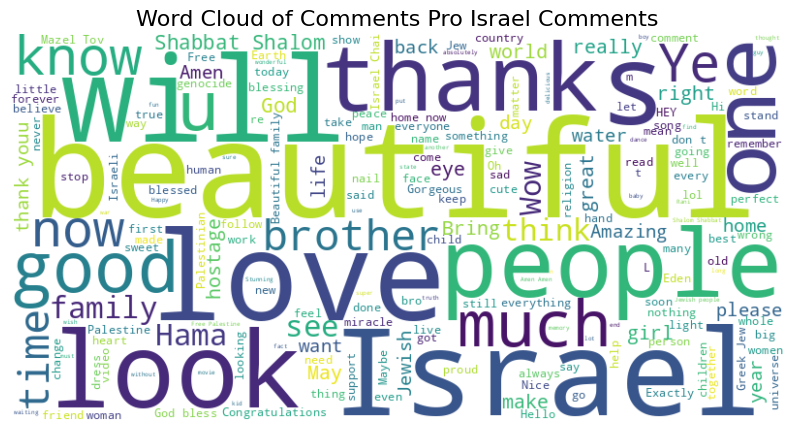

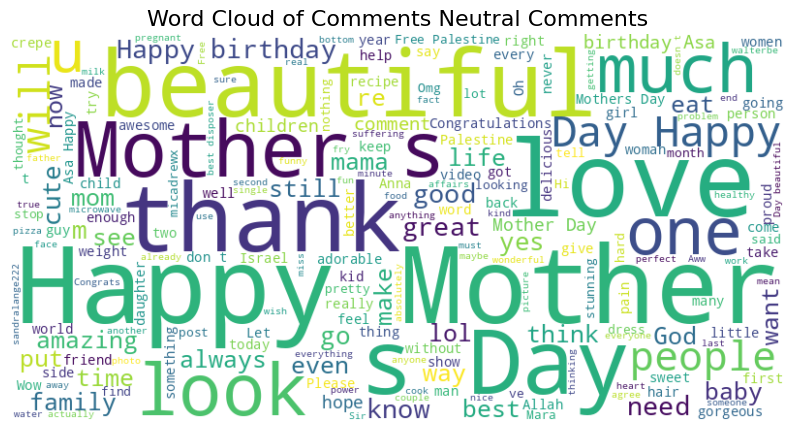

In [41]:
from wordcloud import WordCloud

#word cloud for COMMENTS

# Define a function to generate and display a word cloud
def generate_word_cloud(text_data, title):
    text = ' '.join(text_data.dropna())
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=16)
    plt.show()

# Separate the comment data by category
pro_palestine_comments = dataframes['Translated-pro-palestine-comments (2).csv']
pro_israel_comments = dataframes['translated-pro-israel-comments (2).csv']
neutral_comments = dataframes['Translated-neutral-comments (3).csv']

# Generate and display word clouds for each category
generate_word_cloud(pro_palestine_comments['Translated_Comment_Text'], title='Word Cloud of Comments Pro Palestine Comments')
generate_word_cloud(pro_israel_comments['Translated_Comment_Text'], title='Word Cloud of Comments Pro Israel Comments')
generate_word_cloud(neutral_comments['Translated_Comment_Text'], title='Word Cloud of Comments Neutral Comments')


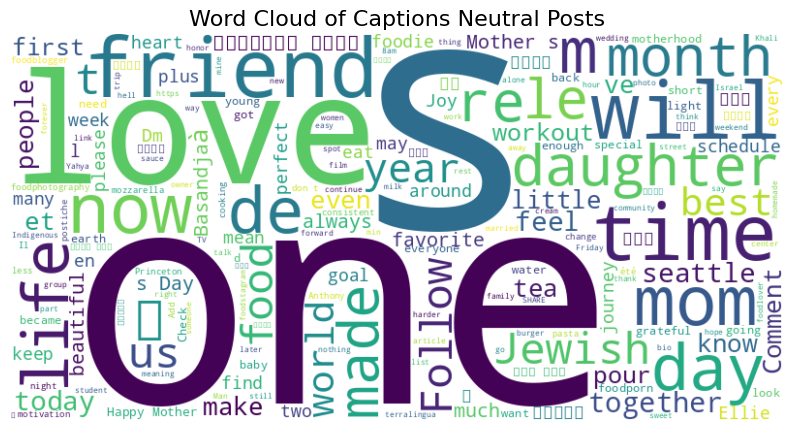

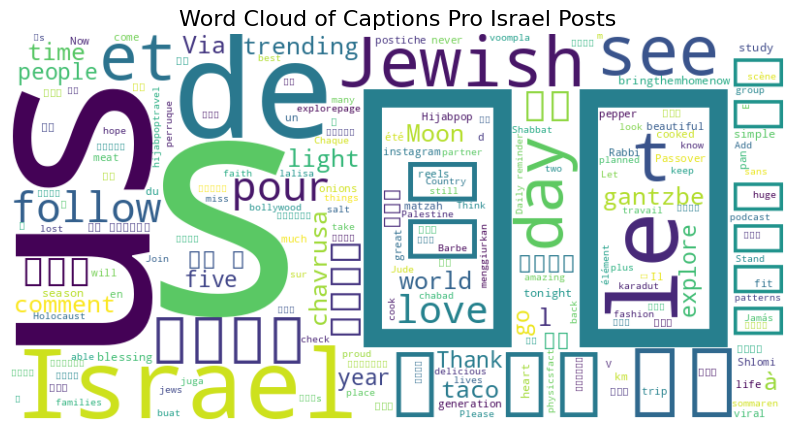

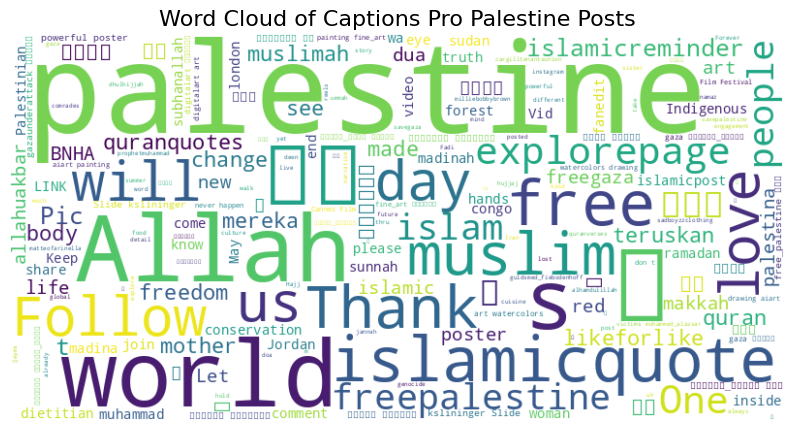

In [42]:
from wordcloud import WordCloud

#word cloud for CAPTION TEXT

# Custom base titles for the posts
custom_titles_posts = {
    'UPDATED-pro-palestine-posts (2).csv': 'Pro Palestine Posts',
    'updated-pro-israel-posts (2).csv': 'Pro Israel Posts',
    'UPDATED-neutral-posts (3).csv': 'Neutral Posts'
}

# Define a function to generate and display a word cloud
def generate_word_cloud(text_data, title):
    text = ' '.join(text_data.dropna())
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=16)
    plt.show()

# Define file names
file_names = ['UPDATED-neutral-posts (3).csv', 'updated-pro-israel-posts (2).csv', 'UPDATED-pro-palestine-posts (2).csv']

# Load and generate word clouds for each file
for file_name in file_names:
    df = pd.read_csv(file_name)
    generate_word_cloud(df['caption_text'], title=f'Word Cloud of Captions {custom_titles_posts[file_name]}')


In [46]:
import nltk
nltk.download

<bound method Downloader.download of <nltk.downloader.Downloader object at 0x7fc67748eb30>>

In [52]:
# Download NLTK stopwords corpus
import nltk
nltk.download('stopwords', download_dir='/usr/local/share/nltk_data')

# Download NLTK WordNet corpus
import nltk
nltk.download('wordnet', download_dir='/usr/local/share/nltk_data')

[nltk_data] Downloading package stopwords to
[nltk_data]     /usr/local/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /usr/local/share/nltk_data...


True

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


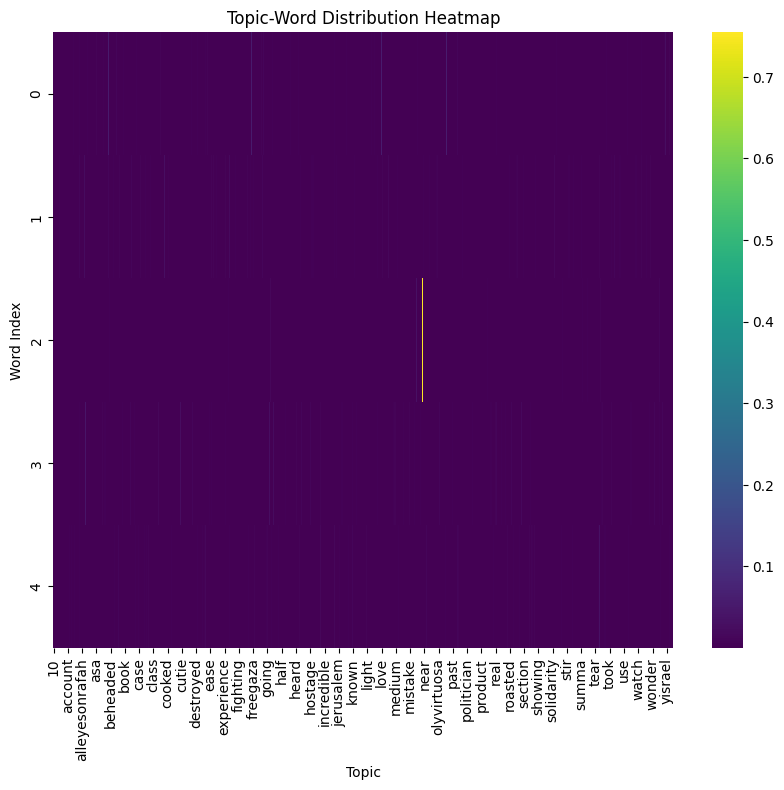

In [57]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.pyplot as plt
import seaborn as sns
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import numpy as np

# Download NLTK stopwords corpus
import nltk
nltk.download('stopwords')

# Load and preprocess text data
def preprocess_text(text):
    # Remove non-alphanumeric characters and convert to lowercase
    text = re.sub(r'[^a-zA-Z0-9\s]', '', str(text).lower())
    # Tokenize text
    tokens = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    # Lemmatize tokens
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    # Join tokens back into a string
    text = ' '.join(tokens)
    return text

# Load and preprocess text data from CSV files
file_names = ['Translated-neutral-comments (3).csv', 'translated-pro-israel-comments (2).csv', 'Translated-pro-palestine-comments (2).csv']
text_data = []

for file_name in file_names:
    df = pd.read_csv(file_name)
    df['Translated_Comment_Text'] = df['Translated_Comment_Text'].apply(preprocess_text)
    text_data.extend(df['Translated_Comment_Text'])

# Vectorize text data using TF-IDF
vectorizer = TfidfVectorizer(max_features=1000, max_df=0.95, min_df=2, stop_words='english')
tfidf = vectorizer.fit_transform(text_data)

# Apply Latent Dirichlet Allocation (LDA)
num_topics = 5
lda_model = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda_model.fit(tfidf)

# Get the probability distribution of words across topics
topic_word_distribution = lda_model.components_ / lda_model.components_.sum(axis=1)[:, np.newaxis]

# Create a DataFrame for the heatmap
heatmap_data = pd.DataFrame(topic_word_distribution, columns=vectorizer.get_feature_names_out())

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, cmap='viridis')
plt.title('Topic-Word Distribution Heatmap')
plt.xlabel('Topic')
plt.ylabel('Word Index')
plt.show()

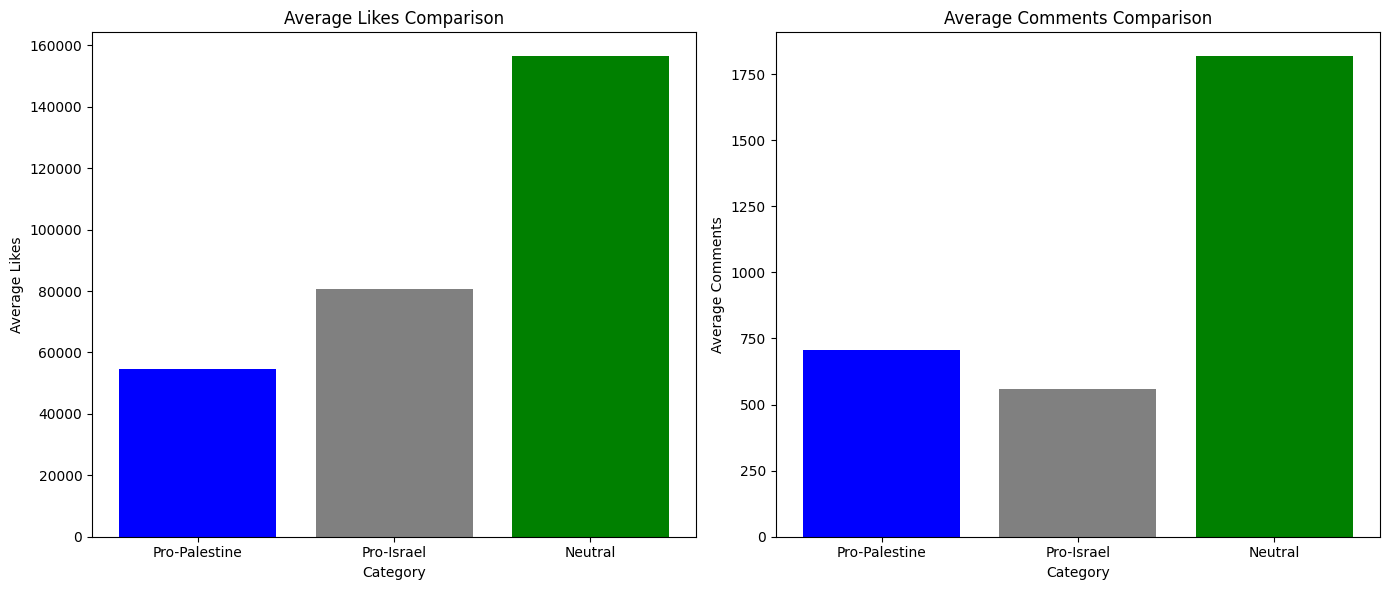

In [69]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data into DataFrames
pro_palestine_posts = pd.read_csv('UPDATED-pro-palestine-posts (2).csv')
pro_israel_posts = pd.read_csv('updated-pro-israel-posts (2).csv')
neutral_posts = pd.read_csv('UPDATED-neutral-posts (3).csv')

# Calculate average engagement metrics
pro_palestine_avg_likes = pro_palestine_posts['like_count'].mean()
pro_palestine_avg_comments = pro_palestine_posts['comment_count'].mean()
pro_israel_avg_likes = pro_israel_posts['like_count'].mean()
pro_israel_avg_comments = pro_israel_posts['comment_count'].mean()
neutral_avg_likes = neutral_posts['like_count'].mean()
neutral_avg_comments = neutral_posts['comment_count'].mean()

# Creating a dataframe for comparison
comparison_df = pd.DataFrame({
    'Category': ['Pro-Palestine', 'Pro-Israel', 'Neutral'],
    'Average Likes': [pro_palestine_avg_likes, pro_israel_avg_likes, neutral_avg_likes],
    'Average Comments': [pro_palestine_avg_comments, pro_israel_avg_comments, neutral_avg_comments]
})

# Plotting the data
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Plotting average likes
ax[0].bar(comparison_df['Category'], comparison_df['Average Likes'], color=['blue', 'gray', 'green'])
ax[0].set_title('Average Likes Comparison')
ax[0].set_xlabel('Category')
ax[0].set_ylabel('Average Likes')

# Plotting average comments
ax[1].bar(comparison_df['Category'], comparison_df['Average Comments'], color=['blue', 'gray', 'green'])
ax[1].set_title('Average Comments Comparison')
ax[1].set_xlabel('Category')
ax[1].set_ylabel('Average Comments')

plt.tight_layout()
plt.show()
